In [1]:
from qiskit import *
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
from scipy.stats import rv_continuous

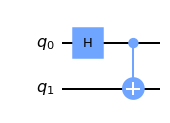

In [2]:
circ = QuantumCircuit(2);
circ.h(0);
# circ.h(1);
circ.cx(0,1);
# circ.cz(0,1);
circ.draw('mpl')

In [3]:
backend = Aer.get_backend('statevector_simulator')
result = execute(circ,backend).result() # Do the simulation, returning the result
out_state = result.get_statevector();
state_vec = np.asmatrix(out_state).T

In [4]:
print(state_vec);

[[0.70710678+0.j]
 [0.        +0.j]
 [0.        +0.j]
 [0.70710678+0.j]]


In [9]:
def I(b,j,n,vec):
    newvec = np.zeros((2**(n-1),1));
    for new_index in range(2**(n-1)):
        original_index = new_index%(2**(n-j)) + (new_index//(2**(n-j)))*(2**(n-j+1)) + b*(2**(n-j));
        # print(original_index);
        newvec[new_index]=vec[int(original_index)];
    return newvec;
def D(u,v,m):
    dist = 0;
    for i in range(m):
        for j in range(m):
            a = u[i]*v[j]-u[j]*v[i];
            # print(np.abs(a))
            dist += (1/2)*np.abs(a)**2;
    return dist;
def Q(n,vec):
    sum = 0;
    for j in range(n):
        sum += D(I(0,j+1,n,vec),I(1,j+1,n,vec),2**(n-1));
    return (sum * 4 / n)[0];

In [10]:
print(Q(2,state_vec))

1.0
